# Forecast of the loss of clients in the Bank

# Content

1. [Project Description](#section1)
2. [Data Preparation](#section2)
3. [Models training](#section3)
4. [Combat to imbalance](#section4)
5. [Models testing](#section5)
6. [General conclusion](#section6)

<a name="section1"></a>
# Project Description

Company "Beta bank" has fased the loss of the clients. The clients are started to terminate the contracts with the bank every month. The quantity of clients who terminated the contact with the bank is not sufficient compare to the total quantity of clients. Marketing department of bank calculated that keep the currents clients is cheaper than to pull the new one to come.

It's required to make a prediction of the locc of clients in nearest time. The historical data provided and has the information on clients behavior and contract termination with bank.

It's required to train the model and get the **"F1** score as high as possible. 
The value of **F1** equal to 0.59 or higher should be achieved. 

Additionaly it's requied to chechk *AUC-ROC* scores of models and compare it.

Data original source: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

<a name="section2"></a>
# Data preparation

**Libraries import**

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import numpy as np

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

**Data loading and overview**

In [3]:
data = pd.read_csv('Churn.csv')
data.head(15)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
data.sort_values(by='Tenure')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6546,6547,15633840,Henderson,781,France,Male,20,0.0,125023.10,2,1,1,108301.45,0
2622,2623,15787026,Onwuatuegwu,627,Germany,Male,27,0.0,185267.45,2,1,1,77027.34,0
886,887,15591711,Sleeman,739,Spain,Male,38,0.0,128366.44,1,1,0,12796.43,0
4532,4533,15739194,Manfrin,548,Spain,Male,38,0.0,178056.54,2,1,0,38434.73,0
8213,8214,15748352,Endrizzi,598,Spain,Male,34,0.0,104488.17,1,0,1,43249.67,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,9945,15703923,Cameron,744,Germany,Male,41,NaN,190409.34,2,1,1,138361.48,0
9956,9957,15707861,Nucci,520,France,Female,46,NaN,85216.61,1,1,0,117369.52,1
9964,9965,15642785,Douglas,479,France,Male,34,NaN,117593.48,2,0,0,113308.29,0
9985,9986,15586914,Nepean,659,France,Male,36,NaN,123841.49,2,1,0,96833.00,0


In [6]:
data.query('Tenure == "NaN"')['RowNumber'].count()

0

In [7]:
data['Tenure'] = data['Tenure'].fillna(0)
data.sort_values(by='Tenure')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9999,10000,15628319,Walker,792,France,Female,28,0.0,130142.79,1,1,0,38190.78,0
6220,6221,15716926,Macleod,807,France,Male,33,0.0,101952.97,2,1,0,178153.65,0
6221,6222,15603554,Berkeley,513,France,Female,45,0.0,164649.52,3,1,0,49915.52,1
6223,6224,15679429,Bell,694,France,Male,32,0.0,91956.49,1,1,1,59961.81,0
6225,6226,15742172,Williamson,598,Germany,Male,32,0.0,123938.60,2,1,0,198894.42,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7579,7580,15649101,Reeves,601,France,Male,40,10.0,127847.86,1,0,0,173245.68,0
7565,7566,15623369,Clifton,708,France,Male,52,10.0,105355.81,1,1,0,123.07,1
1619,1620,15770309,McDonald,656,France,Male,18,10.0,151762.74,1,0,1,127014.32,0
3135,3136,15753874,Kent,694,France,Male,37,10.0,143835.47,1,0,1,33326.71,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [9]:
# deletion of useles columns
data = data.drop(columns = ['RowNumber','CustomerId','Surname'])

In [10]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


**Conclusion**

1) Data successfully imported;

2) Useles columns were deleted;

3) nulls filled with zeros;

4) prepared dataset has 11 columns and 10000 rows.

<a name="section3"></a>
# Models training

**Encoding of categorical data**

In [11]:
data_s = data.copy()

In [12]:
data_s = pd.get_dummies(data_s,drop_first=True)

In [13]:
data_s.head(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0
5,645,44,8.0,113755.78,2,1,0,149756.71,1,0,1,1
6,822,50,7.0,0.00,2,1,1,10062.80,0,0,0,1
7,376,29,4.0,115046.74,4,1,0,119346.88,1,1,0,0
8,501,44,4.0,142051.07,2,0,1,74940.50,0,0,0,1
9,684,27,2.0,134603.88,1,1,1,71725.73,0,0,0,1


In [14]:
features = data_s.drop(columns='Exited')
target = data_s['Exited']

**Dataset splitting on samples**

In [15]:
features_train,features_valid_temp,target_train,target_valid_temp = train_test_split(
    features,target,test_size=0.4, random_state=12345)

In [16]:
features_valid,features_test,target_valid,target_test = train_test_split(features_valid_temp,target_valid_temp,test_size=0.5, random_state=12345)

**Random forest Model training**

In [17]:
rf_model = RandomForestClassifier(random_state=12345)
rf_model.fit(features_train,target_train)
rf_predictions= rf_model.predict(features_valid)

In [18]:
confusion_matrix(target_valid,rf_predictions)

array([[1521,   61],
       [ 222,  196]], dtype=int64)

In [19]:
rf_f1_score = f1_score(target_valid, rf_predictions)
rf_f1_score

0.5807407407407408

In [20]:
recall_score(target_valid, rf_predictions)

0.4688995215311005

In [21]:
precision_score(target_valid, rf_predictions)

0.7626459143968871

In [22]:
accuracy_score(target_valid, rf_predictions)

0.8585

**Plotting of random forest model auc roc curve**

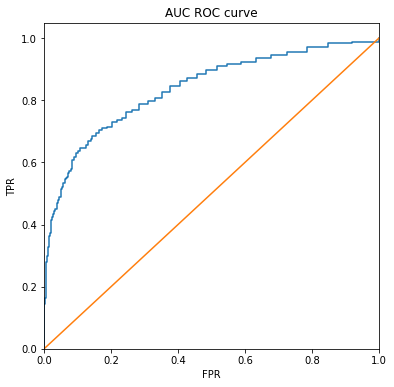

In [23]:
rf_probabilities_valid = rf_model.predict_proba(features_valid)
precision, recall, thresholds = roc_curve(target_valid, rf_probabilities_valid[:, 1])

plt.figure(figsize=(6, 6))
plt.step( precision,recall, where='post')
plt.plot([0.0,1.0],[0.0,1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('AUC ROC curve')
plt.show() 

In [24]:
roc_auc_score(target_valid,rf_probabilities_valid[:, 1])

0.8424114893025

**Conclusions:**

Random Forest model was successfully trained and has the following scores:
1) F1 - 0.53

2) AUC ROC - 0.81

3) recall_score - 0.418

4) precision_score - 0.73

5) accuracy_score - 0.84

<a name="section4"></a>
# Combat to imbalance

**Logistic Regression model training with balanced weight**

In [25]:
lr_model = LogisticRegression(random_state=12345, solver='liblinear',class_weight='balanced')
lr_model.fit(features_train,target_train)
lr_predictions= lr_model.predict(features_valid)

In [26]:
lr_f1_score = f1_score(target_valid, lr_predictions)
lr_f1_score

0.4514056224899599

In [27]:
recall_score(target_valid, lr_predictions)

0.6722488038277512

In [28]:
precision_score(target_valid, lr_predictions)

0.33978234582829503

In [29]:
accuracy_score(target_valid, lr_predictions)

0.6585

In [30]:
confusion_matrix(target_valid,lr_predictions)

array([[1036,  546],
       [ 137,  281]], dtype=int64)

**Plotting of logistic regression model auc roc curve**

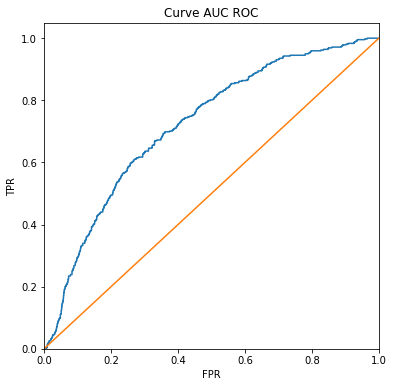

In [31]:
lr_probabilities_valid = lr_model.predict_proba(features_valid)
precision, recall, thresholds = roc_curve(target_valid, lr_probabilities_valid[:, 1])


plt.figure(figsize=(6, 6))
plt.step( precision,recall, where='post')
plt.plot([0.0,1.0],[0.0,1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Curve AUC ROC')
plt.show() 

In [32]:
roc_auc_score(target_valid,lr_probabilities_valid[:, 1])

0.7193909955903435

**Conclusion**

Logistic regression model with balanced class weight has the following scores:

1) F1 - 0.48

2) AUC ROC - 0.75

3) recall_score - 0.37

4) precision_score - 0.73

5) accuracy_score - 0.69

**Upsampling**

In [33]:
features_zeros = features_train[target_train==0]
features_ones = features_train[target_train==1]
target_zeros = target_train[target_train==0]
target_ones = target_train[target_train==1]
n= 15

In [34]:
features_upsampled = pd.concat([features_zeros]+[features_ones]*n)
target_upsampled = pd.concat([target_zeros]+[target_ones]*n)

In [35]:
features_upsampled,target_upsampled = shuffle(features_upsampled,target_upsampled,random_state=12345)

**Random forest model training on upsampled data**

In [36]:
rf_up_model = RandomForestClassifier(random_state=12345)
rf_up_model.fit(features_upsampled,target_upsampled)
rf_up_predictions= rf_up_model.predict(features_valid)
rf_up_f1_score = f1_score(target_valid, rf_up_predictions)
rf_up_f1_score

0.5932885906040269

In [37]:
confusion_matrix(target_valid,rf_up_predictions)

array([[1476,  106],
       [ 197,  221]], dtype=int64)

In [38]:
recall_score(target_valid, rf_up_predictions)

0.5287081339712919

In [39]:
precision_score(target_valid, rf_up_predictions)

0.6758409785932722

**Plotting of upsampled rf model auc roc curve**

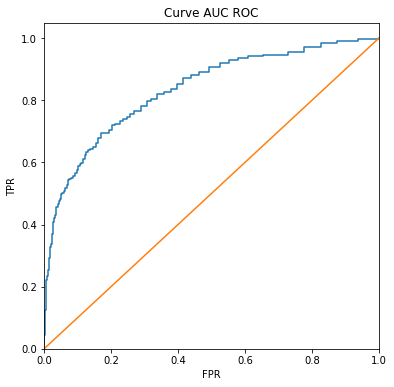

In [40]:
rf_up_probabilities_valid = rf_up_model.predict_proba(features_valid)
precision, recall, thresholds = roc_curve(target_valid, rf_up_probabilities_valid[:, 1])

plt.figure(figsize=(6, 6))
plt.step( precision,recall, where='post')
plt.plot([0.0,1.0],[0.0,1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Curve AUC ROC')
plt.show() 

In [41]:
roc_auc_score(target_valid,rf_up_probabilities_valid[:, 1])

0.8381833001651353

In [42]:
accuracy_score(target_valid, rf_up_predictions)

0.8485

**Conclusion**

Random forest model on upsampled data has the following scores:

1) F1 - 0.57

2) AUC ROC - 0.808

3) recall_score - 0.50

4) precision_score - 0.65

5) accuracy_score - 0.84

**Downsampling**

In [43]:
features_zeros = features_train[target_train==0]
features_ones = features_train[target_train==1]
target_zeros = target_train[target_train==0]
target_ones = target_train[target_train==1]
m= 0.02

In [44]:
features_downsampled = pd.concat(
        [features_zeros.sample(frac=m, random_state=12345)] + [features_ones])
target_downsampled = pd.concat(
        [target_zeros.sample(frac=m, random_state=12345)] + [target_ones])

In [45]:
features_downsampled,target_downsampled = shuffle(features_upsampled,target_upsampled,random_state=12345)

In [46]:
rf_dn_model = RandomForestClassifier(random_state=12345)
rf_dn_model.fit(features_downsampled,target_downsampled)
rf_dn_predictions= rf_dn_model.predict(features_valid)
rf_dn_f1_score = f1_score(target_valid, rf_dn_predictions)
rf_dn_f1_score

0.5850340136054422

In [47]:
confusion_matrix(target_valid,rf_dn_predictions)

array([[1480,  102],
       [ 203,  215]], dtype=int64)

In [48]:
rf_dn_probabilities_valid = rf_dn_model.predict_proba(features_valid)
precision_score(target_valid, rf_dn_predictions)

0.6782334384858044

In [49]:
recall_score(target_valid, rf_dn_predictions)

0.5143540669856459

In [50]:
roc_auc_score(target_valid,rf_dn_probabilities_valid[:, 1])

0.837675947713209

In [51]:
accuracy_score(target_valid, rf_dn_predictions)

0.8475

**Plotting of downsampled rf model auc roc curve**

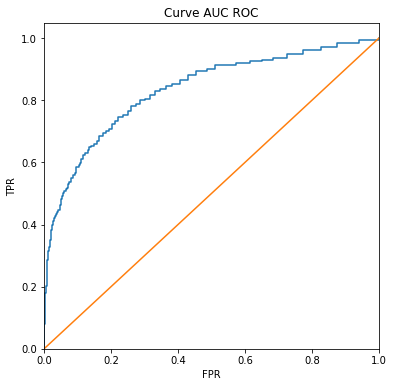

In [52]:
probabilities_valid = rf_dn_model.predict_proba(features_valid)
precision, recall, thresholds = roc_curve(target_valid, probabilities_valid[:, 1])

plt.figure(figsize=(6, 6))
plt.step( precision,recall, where='post')
plt.plot([0.0,1.0],[0.0,1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Curve AUC ROC')
plt.show() 

**Conclusion**

Random forest model with downsampling has the follwoing scores:

1) F1 - 0.55

2) AUC ROC - 0.81

3) recall_score - 0.47

4) precision_score - 0.66

5) accuracy_score - 0.84

**Hyperparameters tuning**

In [53]:
%%time

models = [RandomForestClassifier,DecisionTreeClassifier]

f1_best=0
for c in models:
        for d in range(2):
            if d == 0:
                e = features_downsampled
                f = target_downsampled
                g = 'downsampled'
            elif d == 1:
                e = features_upsampled
                f = target_upsampled
                g = 'upsampled'                
            else:
                e = features_train
                f = target_train
                g = 'train'
            for depth in range (10,210,50):
                if c == RandomForestClassifier:
                    for estimators in range (10,210,50):
                        tuned_model = c(n_estimators = estimators , max_depth = depth, random_state=12345,
                                        class_weight ='balanced')
                        tuned_model.fit(e,f)
                        tuned_predictions= tuned_model.predict(features_valid)
                        F1_temp = f1_score(target_valid, tuned_predictions)
                        if f1_best < F1_temp:
                            f1_best = F1_temp
                            best_model = c
                            best_features = g
                            best_depth = depth
                            best_estimators = estimators
                elif c == DecisionTreeClassifier:
                    tuned_model = c(max_depth = depth, random_state=12345,class_weight ='balanced')
                    tuned_model.fit(e,f)
                    tuned_predictions= tuned_model.predict(features_valid)
                    F1_temp = f1_score(target_valid, tuned_predictions)
                    if f1_best < F1_temp:
                        f1_best = F1_temp
                        best_model = c
                        best_features = g
                        best_depth = depth
                        best_estimators = estimators
print(f1_best,'\n',best_model,'\n',best_features,'\n',best_depth,'\n',best_estimators)

0.6293103448275862 
 <class 'sklearn.ensemble._forest.RandomForestClassifier'> 
 upsampled 
 10 
 60
CPU times: total: 41 s
Wall time: 41.1 s


In [54]:
tuned_model = best_model(n_estimators = best_estimators, max_depth =best_depth, random_state=12345, class_weight = 'balanced')
tuned_model.fit(e, f)
tuned_predictions = tuned_model.predict(features_valid)

In [55]:
tuned_f1 = f1_score(target_valid, tuned_predictions)
tuned_f1

0.6293103448275862

In [56]:
accuracy_score(target_valid, tuned_predictions)

0.828

In [57]:
recall_score(target_valid, tuned_predictions)

0.6985645933014354

In [58]:
tuned_probabilities_valid = tuned_model.predict_proba(features_valid)
roc_auc_score(target_valid,tuned_probabilities_valid[:, 1])

0.8502728059085768

In [59]:
precision_score(target_valid, tuned_predictions)

0.5725490196078431

**Plotting of AUC ROC curve of tuned model**

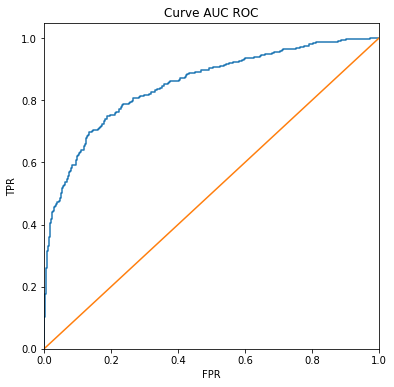

In [60]:
tuned_probabilities_valid = tuned_model.predict_proba(features_valid)
precision, recall, thresholds = roc_curve(target_valid, tuned_probabilities_valid[:, 1])

plt.figure(figsize=(6, 6))
plt.step(precision,recall, where='post')
plt.plot([0.0,1.0],[0.0,1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Curve AUC ROC')
plt.show()

**Conclusions**

Using hyperparamters tuning the model has the following scores: 

1) F1 ~ 0.629

2) AUC ROC ~ 0.85

3) recall_score ~ 0.44

4) precision_score ~ 0.57

5) accuracy_score ~ 0.828

**Selection of best model**

In [61]:
models_df = pd.DataFrame({'model_name': ['rf_model','lr_model','rf_up_model','rf_dn_model','tuned_model'],
                          'model': [rf_model,lr_model,rf_up_model,rf_dn_model,tuned_model],
                          'F1': [rf_f1_score,lr_f1_score,rf_up_f1_score,rf_dn_f1_score,tuned_f1] })

In [62]:
models_df = models_df.sort_values(by = 'F1', ascending = 0).reset_index(drop = True)
models_df

,model_name,model,F1
0,tuned_model,"(DecisionTreeClassifier(max_depth=10, max_feat...",0.629310
1,rf_up_model,"(DecisionTreeClassifier(max_features='sqrt', r...",0.593289
2,rf_dn_model,"(DecisionTreeClassifier(max_features='sqrt', r...",0.585034
3,rf_model,"(DecisionTreeClassifier(max_features='sqrt', r...",0.580741
4,lr_model,"LogisticRegression(class_weight='balanced', ra...",0.451406


In [63]:
best_model = models_df['model'][0]
best_model

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=60,
                       random_state=12345)

**Conclusion**

1) Five models were trained and compared: 
- randomforest model;
- linear regression with class balance;
- random forest with class upsampling;
- random forest with class downsampling;
- random forest with hyperparamters tuning.

2) Best F1 score was achieved using tuned model. The model was selected for testing.

<a name="section5"></a>
# Model testing

In [64]:
best_model.fit(features_upsampled, target_upsampled)
test_predictions = best_model.predict(features_test)
print( 'Test_f1:', f1_score(target_test,test_predictions))

Test_f1: 0.5982905982905982


In [65]:
accuracy_score(target_test, test_predictions)

0.812

In [66]:
recall_score(target_test, test_predictions)

0.6619385342789598

In [67]:
test_probabilities = best_model.predict_proba(features_test)
roc_auc_score(target_test,test_probabilities[:, 1])

0.8544157968192292

In [68]:
precision_score(target_test, test_predictions)

0.5458089668615984

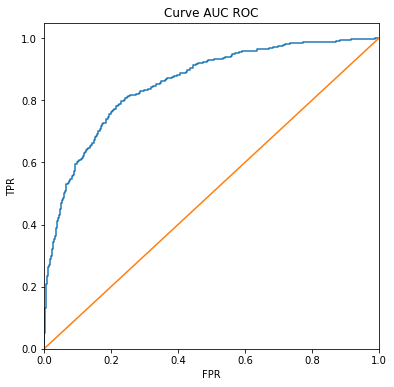

In [69]:
test_probabilities = best_model.predict_proba(features_test)
precision, recall, thresholds = roc_curve(target_test, test_probabilities[:, 1])

plt.figure(figsize=(6, 6))
plt.step(precision,recall, where='post')
plt.plot([0.0,1.0],[0.0,1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Curve AUC ROC')
plt.show()

**Conclusion**

Testing of the model with highest F1 score on valid sample has the following scores:

1) F1 ~ 0.598

2) AUC ROC ~ 0.85

3) recall_score ~ 0.67

4) precision_score ~ 0.54

5) accuracy_score ~ 0.81

<a name="section6"></a>
# General conclusion

1) Data was successfully imported, prepared and encoded.

2) Dataset was splitted on train, valid and test samples.

3) Five models were train, four of them were using the different tools for combat to imbalance of classes:
 - balancing of weight of classes;
 - upsampling;
 - down sampling;

4) The best model was selected after comparison. The model has tuned hyperparameters and balanced class weight.

5) The main goal was achieved - the F1 score is above 0.59.